# House Prices Prediction

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline
import seaborn as sns
%pylab inline

from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection, tree, metrics, ensemble
import xgboost as xgb

import tensorflow as tf
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.utils import plot_model

from warnings import filterwarnings
filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def log_data(x):
    return np.log(x+1)

def log_inverse(x):
    return np.exp(x)-1

**Problem description**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

This dataset is comig from a popular Kaggle competition "House Price".

**Used techniques**

For this competition we will use some advance reggression techniques like Random Forest and Gradient Boosting. Also we are going to use a simle Neuronal Network. The Neuronal Networks are becomig more and more popular. So, is  the Deep Learning always better than classic Machine Learning? Let's see!

## 1. Data description

Here's a brief features description.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale 

The more detailed description is in *data_description.txt* file.

## 2. Data Load & Preprocessing

In [3]:
data = pd.read_csv('train.csv', index_col='Id')
print(data.shape)
data.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


First, let's see how much null we have.

In [4]:
for col_name in data.columns:
    if data[(data[col_name].isna())].shape[0] > 0:
        print (col_name, '   ', round(100*(1-((data.loc[:,col_name].dropna()).shape[0])/data.shape[0]), 2), '%')

LotFrontage     17.74 %
Alley     93.77 %
MasVnrType     0.55 %
MasVnrArea     0.55 %
BsmtQual     2.53 %
BsmtCond     2.53 %
BsmtExposure     2.6 %
BsmtFinType1     2.53 %
BsmtFinType2     2.6 %
Electrical     0.07 %
FireplaceQu     47.26 %
GarageType     5.55 %
GarageYrBlt     5.55 %
GarageFinish     5.55 %
GarageQual     5.55 %
GarageCond     5.55 %
PoolQC     99.52 %
Fence     80.75 %
MiscFeature     96.3 %


We have 2 features that contain more than 90% of nulls. So, they are going to be dropped.

In [5]:
col_drop1 = ['PoolQC', 'MiscFeature']
train_data = data.drop(columns=col_drop1) 

Also there are some categorical features that can be passed to be real features as they use just a level description. That will help to  not elevate too much our data dimension after encoding of categorical features.

In [6]:
features_to_real = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC', 'KitchenQual','FireplaceQu', \
                   'GarageQual', 'GarageCond']

for feature in features_to_real:
    train_data.loc[train_data[feature]=='NA',feature]=1            # No Basement
    train_data.loc[train_data[feature]=='Po',feature]=2            # Poor
    train_data.loc[train_data[feature]=='Fa',feature]=3            # Fair
    train_data.loc[train_data[feature]=='TA',feature]=4            # Typical
    train_data.loc[train_data[feature]=='Gd',feature]=5            # Good
    train_data.loc[train_data[feature]=='Ex',feature]=6            # Excellent
    train_data.loc[train_data[feature].isnull(),feature]=0    

### 2.1. Real features analysis

Let's divide all features into real and categorical.

In [7]:
real_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',\
                 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', \
                 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', \
                 'BedroomAbvGr','KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', \
                 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', \
                 'PoolArea', 'MiscVal', 'YrSold', \
                 'ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC', 'KitchenQual', 'FireplaceQu', 
                 'GarageQual', 'GarageCond']    
for feature in real_features:
    train_data[feature] = train_data[feature].astype('float32')
    
cat_features = train_data.columns.drop(real_features).tolist()
cat_features.remove('SalePrice')
print(cat_features)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MoSold', 'SaleType', 'SaleCondition']


The heatmap is a good way to see if we have some high correlated features in our dataset.

Populating the interactive namespace from numpy and matplotlib


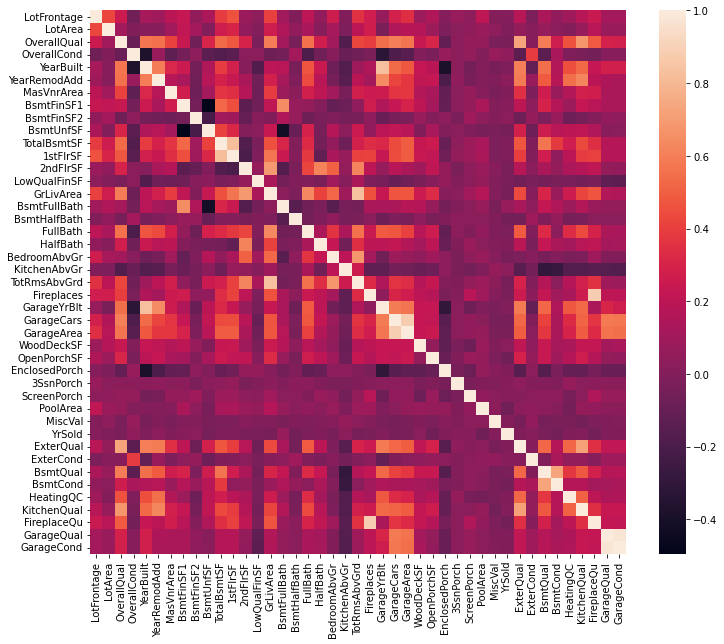

In [8]:
%pylab inline
pylab.figure(figsize(12, 10))
seaborn.heatmap(train_data[real_features].corr());

We can observe there are possible linear correlations between some features. Let's observe them more detailed.

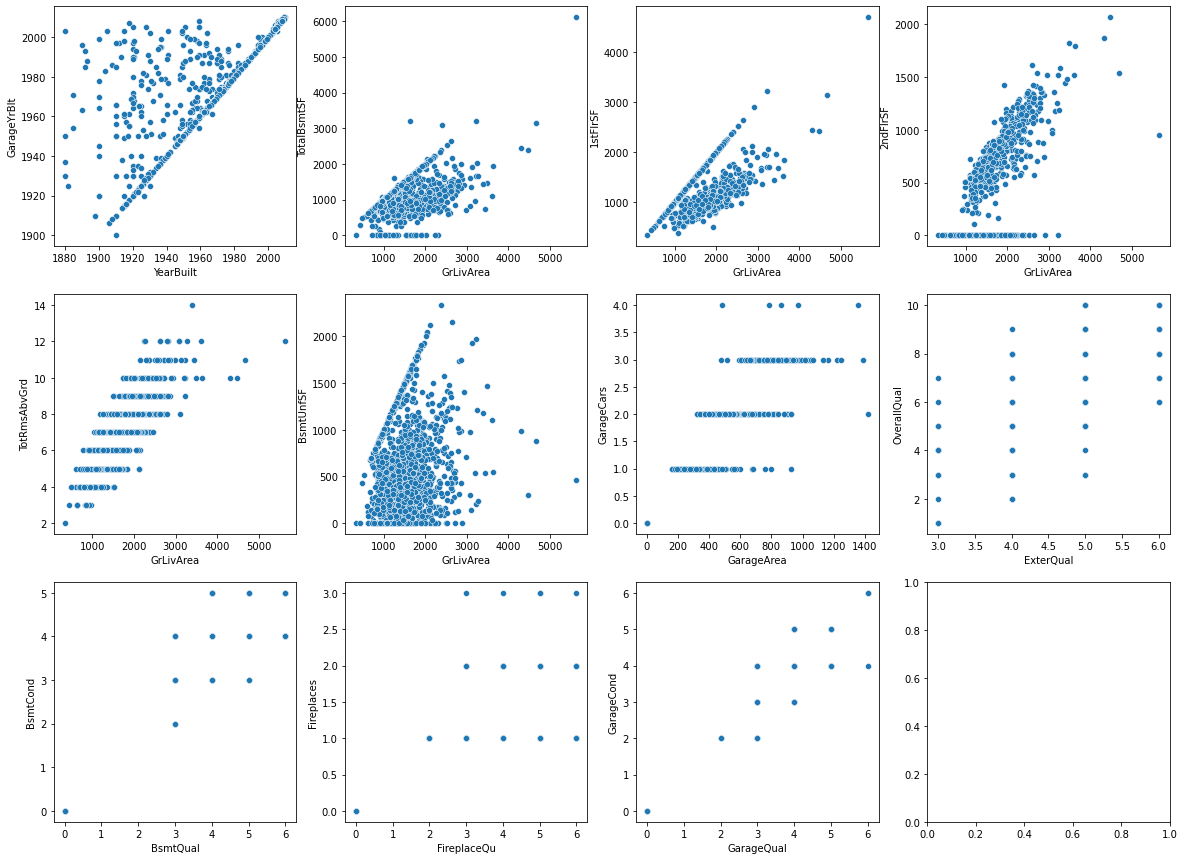

In [9]:
fig, ax = plt.subplots(3, 4,  figsize=(20, 15))
sns.scatterplot(train_data['YearBuilt'], train_data['GarageYrBlt'], ax=ax[0,0])
sns.scatterplot(train_data['GrLivArea'], train_data['TotalBsmtSF'], ax=ax[0,1])
sns.scatterplot(train_data['GrLivArea'], train_data['1stFlrSF'], ax=ax[0,2])
sns.scatterplot(train_data['GrLivArea'], train_data['2ndFlrSF'], ax=ax[0,3])
sns.scatterplot(train_data['GrLivArea'], train_data['TotRmsAbvGrd'], ax=ax[1,0])
sns.scatterplot(train_data['GrLivArea'], train_data['BsmtUnfSF'], ax=ax[1,1])
sns.scatterplot(train_data['GarageArea'], train_data['GarageCars'], ax=ax[1,2])
sns.scatterplot(train_data['ExterQual'], train_data['OverallQual'], ax=ax[1,3])
sns.scatterplot(train_data['BsmtQual'], train_data['BsmtCond'], ax=ax[2,0])
sns.scatterplot(train_data['FireplaceQu'], train_data['Fireplaces'], ax=ax[2,1])
sns.scatterplot(train_data['GarageQual'], train_data['GarageCond'], ax=ax[2,2])
plt.show()

In [10]:
print('Correlation coefficients:\n')
print('YearBuilt Vs. GarageYrBlt: ', train_data[['YearBuilt','GarageYrBlt']].corr().iloc[0, 1])
print('GrLivArea Vs. TotalBsmtSF: ', train_data[['GrLivArea', 'TotalBsmtSF']].corr().iloc[0, 1])
print('GrLivArea Vs. 1stFlrSF:', train_data[['GrLivArea', '1stFlrSF']].corr().iloc[0, 1])
print('GrLivArea Vs. 2ndFlrSF: ', train_data[['GrLivArea','2ndFlrSF']].corr().iloc[0, 1])
print('GrLivArea vs.TotRmsAbvGrd:', train_data[['GrLivArea','TotRmsAbvGrd']].corr().iloc[0, 1])
print('GrLivArea Vs. BsmtUnfSF:', train_data[['GrLivArea', 'BsmtUnfSF',]].corr().iloc[0, 1])
print('GarageArea Vs. GarageCars:', train_data[['GarageArea','GarageCars']].corr().iloc[0, 1])
print('ExterQual Vs. OverallQual:', train_data[['ExterQual','OverallQual']].corr().iloc[0, 1])
print('BsmtQual Vs. BsmtCond:', train_data[['BsmtQual','BsmtCond']].corr().iloc[0, 1])
print('FireplaceQu Vs. Fireplaces:', train_data[['FireplaceQu','Fireplaces']].corr().iloc[0, 1])
print('GarageQual Vs. GarageCond:', train_data[['GarageQual','GarageCond']].corr().iloc[0, 1])

Correlation coefficients:

YearBuilt Vs. GarageYrBlt:  0.8256674841743408
GrLivArea Vs. TotalBsmtSF:  0.4548682025479031
GrLivArea Vs. 1stFlrSF: 0.5660239689357486
GrLivArea Vs. 2ndFlrSF:  0.6875010641666034
GrLivArea vs.TotRmsAbvGrd: 0.8254893743088425
GrLivArea Vs. BsmtUnfSF: 0.240257268349935
GarageArea Vs. GarageCars: 0.882475414281462
ExterQual Vs. OverallQual: 0.7262784907641429
BsmtQual Vs. BsmtCond: 0.725642338823206
FireplaceQu Vs. Fireplaces: 0.8780797417022216
GarageQual Vs. GarageCond: 0.9759871168270975


Let's eliminate highly correlated features.

In [11]:
col_drop2 = ['GarageYrBlt', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd',  'GarageCars', 'ExterQual', 'BsmtCond', 
             'FireplaceQu', 'GarageCond']
for col in col_drop2:
    real_features.remove(col)
len(real_features)

34

If we repeat the heatmap now, it will see much better.

Populating the interactive namespace from numpy and matplotlib


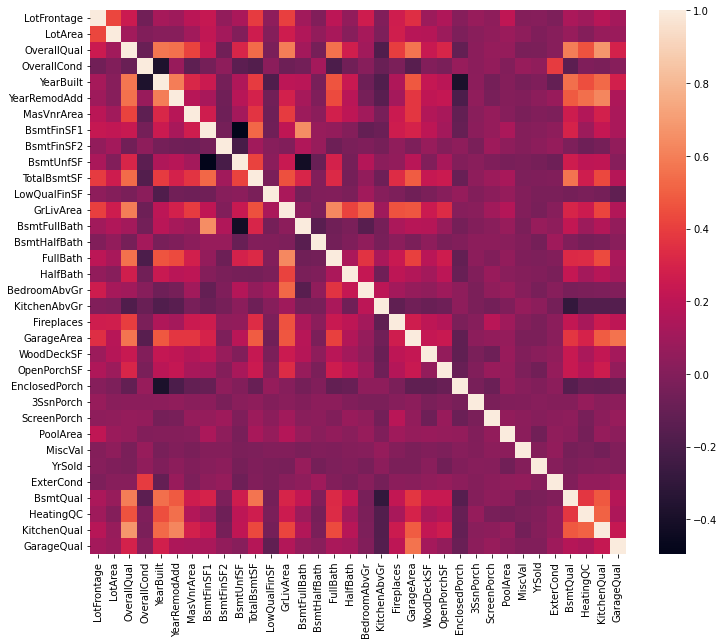

In [12]:
%pylab inline
pylab.figure(figsize(12, 10))
seaborn.heatmap(train_data[real_features].corr());

Let's build scatter plots of real features Vs. target feature for more analysis.

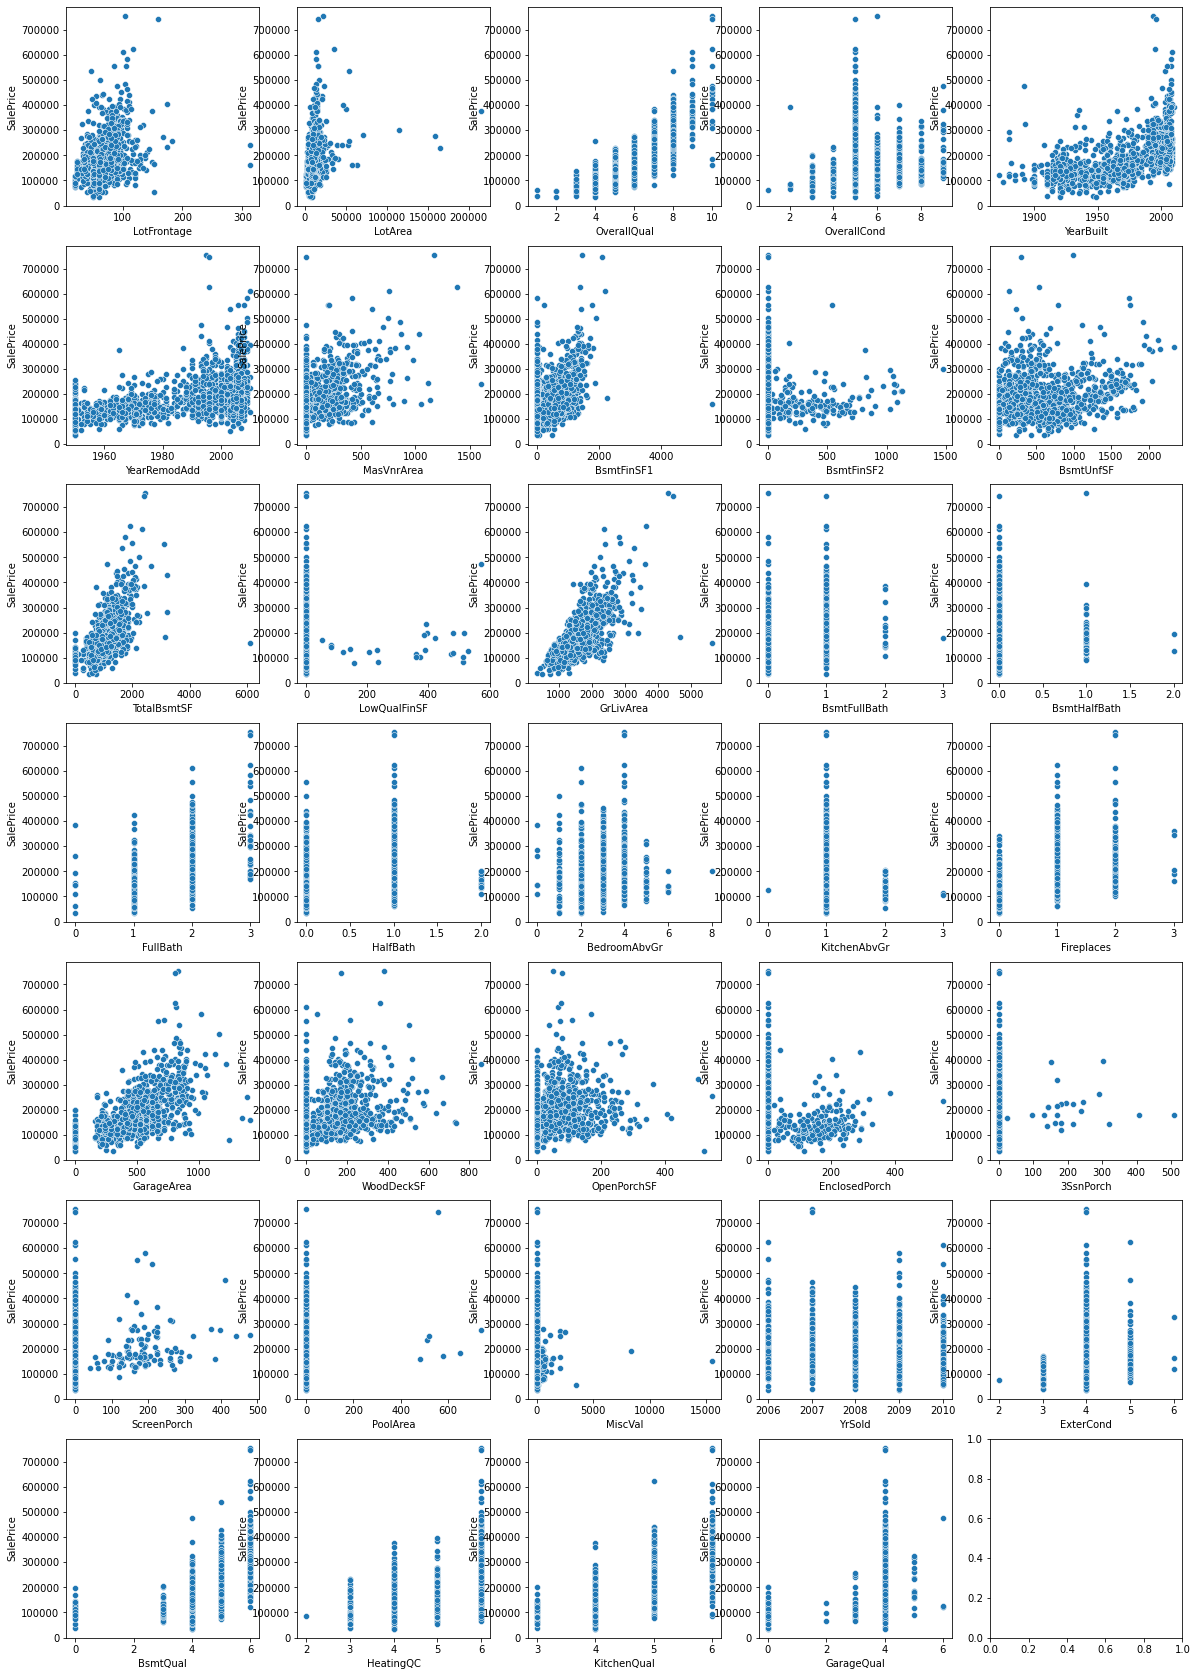

In [13]:
# Scatterplots with Outliers
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 30))
for idx, feature in enumerate(train_data[real_features].columns):
    sns.scatterplot(train_data[real_features][feature], train_data['SalePrice'], ax=axes[idx//5, idx %5]);

First, we can observe some constant features with a lot of zero values. Let's look how many they are.

In [14]:
zero_features = ['LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'BsmtFinSF2']
for col in zero_features:
    print (col, ': ', round(100*(train_data[col][train_data[col]==0].shape[0]/train_data.shape[0]), 2), '%')

LowQualFinSF :  98.22 %
BsmtHalfBath :  94.38 %
3SsnPorch :  98.36 %
ScreenPorch :  92.05 %
PoolArea :  99.52 %
MiscVal :  96.44 %
BsmtFinSF2 :  88.56 %


So, the features with more than 95% zeros are going to be eliminated as they are not useful for further model training.

In [15]:
col_drop3 = ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'] 

for col in col_drop3:
    real_features.remove(col)
len(real_features)

30

Next, we need to remove or replace some outliers. As we have a small dataset, the outliers will be replaced by median value.

In [16]:
train_data.loc[train_data['LotFrontage']>250,'LotFrontage']=train_data['LotFrontage'].median()
train_data.loc[(train_data['YearBuilt']<1900)&(train_data['SalePrice']>400000),'YearBuilt']=train_data['YearBuilt'].median()
train_data.loc[train_data['MasVnrArea']>1500,'MasVnrArea']=train_data['MasVnrArea'].median()
train_data.loc[train_data['BsmtFinSF1']>4000,'BsmtFinSF1']=train_data['BsmtFinSF1'].median()
train_data.loc[train_data['BsmtFinSF2']>1400,'BsmtFinSF2']=train_data['BsmtFinSF2'].median()
train_data.loc[train_data['TotalBsmtSF']>5000,'TotalBsmtSF']=train_data['TotalBsmtSF'].median()
train_data.loc[(train_data['GrLivArea']>4000)&(train_data['SalePrice']<300000),'GrLivArea']=train_data['GrLivArea'].median()
train_data.loc[train_data['OpenPorchSF']>500,'OpenPorchSF']=train_data['OpenPorchSF'].median()

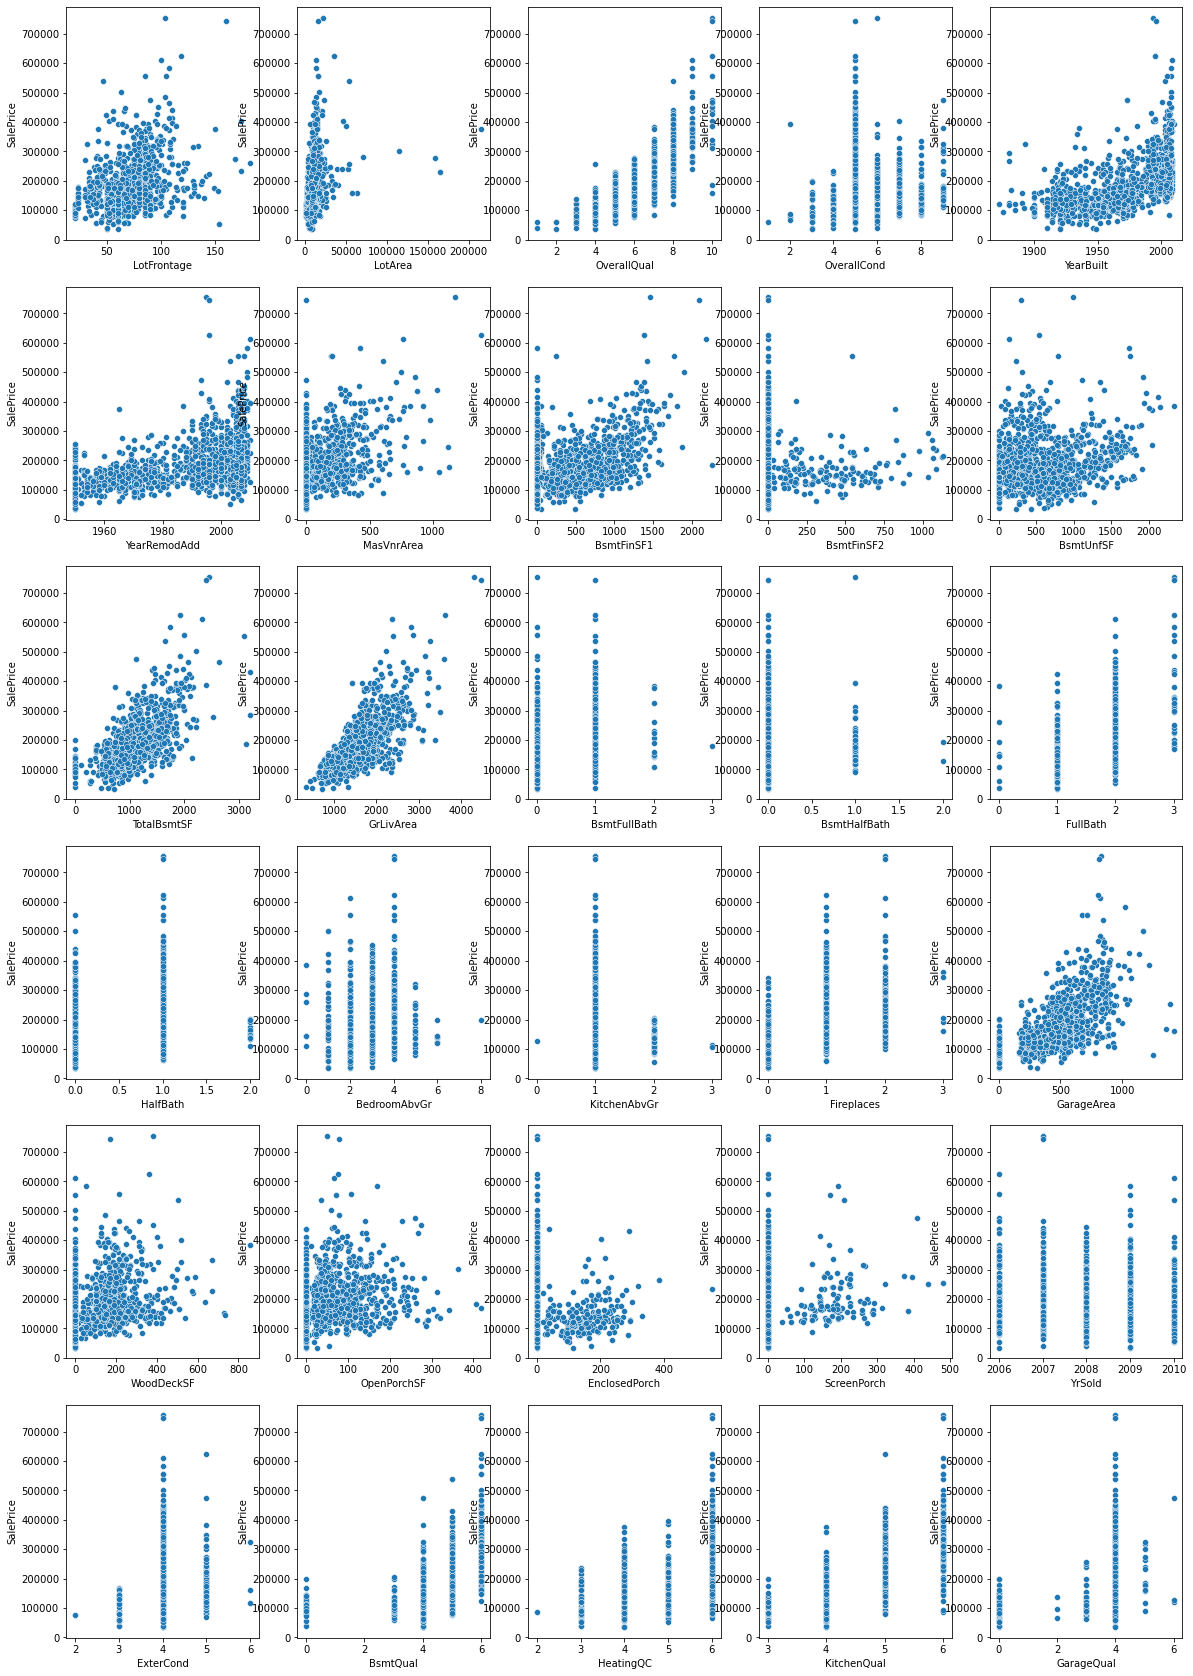

In [17]:
# Scatterplots without Outliers
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 30))
for idx, feature in enumerate(train_data[real_features].columns):
    sns.scatterplot(train_data[real_features][feature], train_data['SalePrice'], ax=axes[idx//5, idx %5]);

The last thing we will do is handling missing values in our real features.

In [18]:
for col_name in train_data[real_features].columns:
    if train_data[(train_data[col_name].isna())].shape[0] > 0:
        print (col_name, '   ', round(100*(1-((train_data.loc[:,col_name].dropna()).shape[0])/train_data.shape[0]), 2), '%')

LotFrontage     17.74 %
MasVnrArea     0.55 %


In [19]:
# Replace by mean and median

train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(),inplace=True)
train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median(),inplace=True)

### 2.2. Categorical features analysis

We will use countplot to visualize our categorical data.

[]

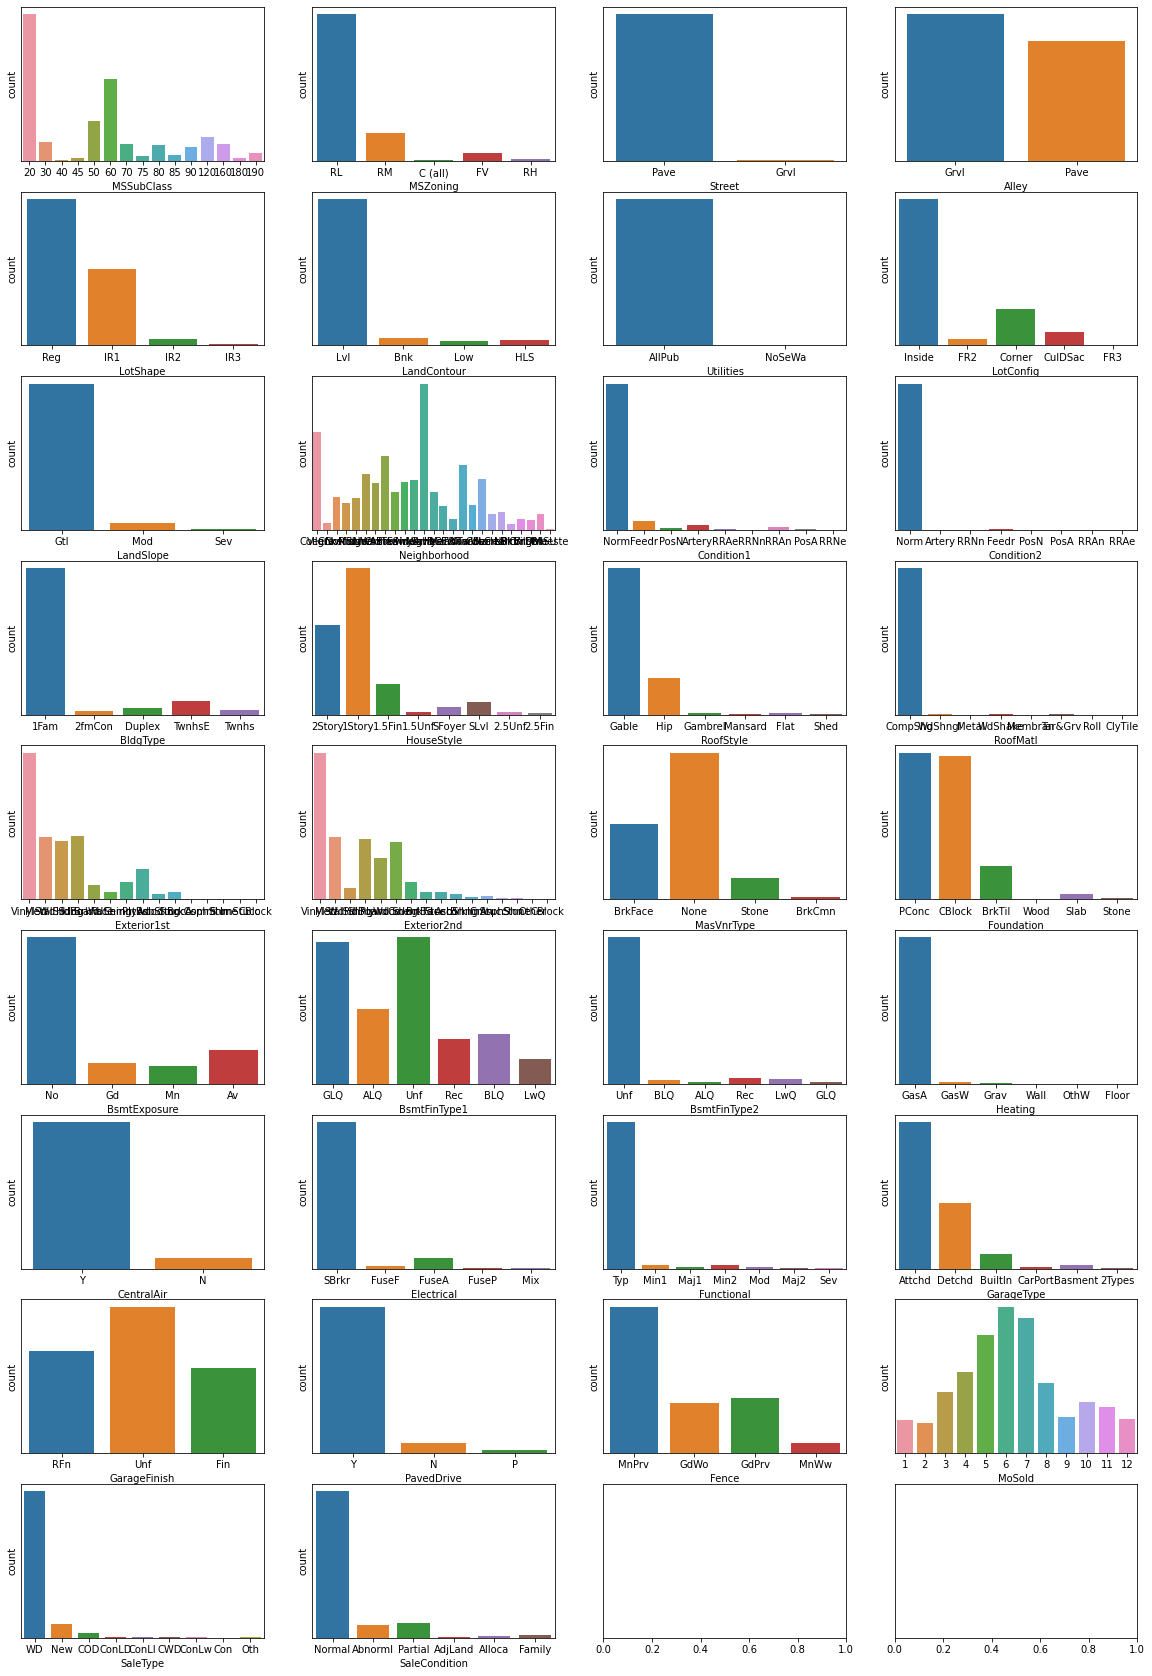

In [20]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 30))
for idx, feature in enumerate(train_data[cat_features].columns):
    sns.countplot(train_data[cat_features][feature], ax=axes[idx //4, idx % 4]);
plt.setp(axes, yticks=[])

Again we observe some almost constant features:

In [21]:
train_data['Street'].value_counts() 

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [22]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
train_data['Condition2'].value_counts() 

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

Such features will be eliminated as well.

In [24]:
col_drop4 = ['Street', 'Utilities', 'Condition2']

for col in col_drop4:
    cat_features.remove(col)
len(cat_features)

31

### 2.3. Target variable analysis

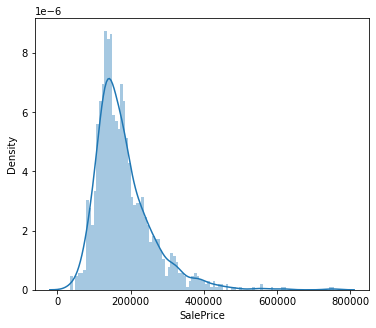

In [25]:
pylab.figure(figsize=(6,5))
sns.distplot(train_data['SalePrice'], kde=True, bins=100);

The target variable of our dataset doesn't have a normal distribution. We can apply logarithm transformation to get it more normal.

In [26]:
train_data['SalePrice_log'] = train_data['SalePrice'].apply(log_data)

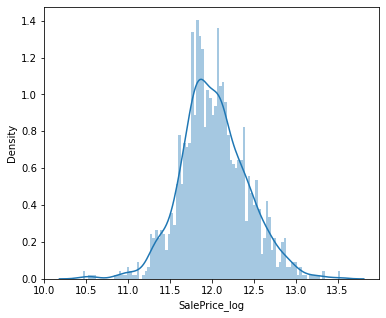

In [27]:
pylab.figure(figsize=(6,5))
sns.distplot(train_data['SalePrice_log'], kde=True, bins=100);

As we have seen the logarithm transformation worked, we can use *mean squared log error* instead of *mean squared error* as loss function, so we don't need to apply transformation before training.

### 2.4. Data preparation

In [28]:
# Change format

for feature in cat_features:
    train_data[feature] = train_data[feature].astype('str')    

In [29]:
# Shuffle before split data to train and validation set

train_data = train_data.sample(frac=1, replace=True, random_state=0) 

In [30]:
real_data = train_data[real_features]

In [31]:
# One Hot encoding for categorical features

enc = OneHotEncoder()
enc.fit(train_data[cat_features])    
cat_data = enc.transform(train_data[cat_features]).toarray()
print('Normal shape:', train_data[cat_features].shape, 'Encoder shape:', cat_data.shape)

Normal shape: (1460, 31) Encoder shape: (1460, 221)


In [32]:
X = np.hstack((real_data, cat_data))
train_data['SalePrice'] = train_data['SalePrice'].astype('float32')
Y = train_data['SalePrice'].to_numpy()

In [33]:
# Split our dataset into 80% for training and 20% for validation

X_train = X[:1168, :]
X_val = X[1168:, :]
Y_train = Y[:1168]
Y_val = Y[1168:]
print(f'Data for traing:  {X_train.shape} \nData for validation:  {X_val.shape}')

Data for traing:  (1168, 251) 
Data for validation:  (292, 251)


## 3. Model fitting

### 3.1.  Random Forest

In [34]:
# Using random grid search to find best parameters

parameters_grid = {
    'max_depth' : [8, 10, 12, 14, 16, 18, 20],
    'max_features' : [120, 130, 140, 150, 160, 170, 180, 200, 220, 240],
    'min_samples_leaf': [1, 2]
}

In [35]:
regressor = ensemble.RandomForestRegressor(random_state=1)
random_cv = model_selection.RandomizedSearchCV(regressor, 
                                               parameters_grid, 
                                               scoring = 'neg_mean_squared_log_error',
                                               cv = 3)

In [36]:
%%time
random_cv.fit(X_train, Y_train)

CPU times: user 24.1 s, sys: 102 ms, total: 24.2 s
Wall time: 24.2 s


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   param_distributions={'max_depth': [8, 10, 12, 14, 16, 18,
                                                      20],
                                        'max_features': [120, 130, 140, 150,
                                                         160, 170, 180, 200,
                                                         220, 240],
                                        'min_samples_leaf': [1, 2]},
                   scoring='neg_mean_squared_log_error')

In [37]:
print (random_cv.best_score_)
print (random_cv.best_params_)

-0.015126600649580532
{'min_samples_leaf': 1, 'max_features': 130, 'max_depth': 10}


In [38]:
RF_model = random_cv.best_estimator_
Y_pred_rf = RF_model.predict(X_val)
metrics.mean_squared_log_error(Y_pred_rf, Y_val)

0.011948830380328939

### 3.2. Gradient Boosting

In [39]:
parameters_grid = {
    'n_estimators' : [80, 90, 100],
    'max_depth' : [3, 4, 5],
    'learning_rate': [0.09, 0.1, 0.11, 0.12, 0.13]
}

In [40]:
regressor= xgb.XGBRegressor(random_state=1, verbosity=0)
random_cv = model_selection.RandomizedSearchCV(regressor, 
                                               parameters_grid, 
                                               scoring='neg_mean_squared_log_error', 
                                               cv=3)

In [41]:
%%time
random_cv.fit(X_train, Y_train)

CPU times: user 50.3 s, sys: 515 ms, total: 50.8 s
Wall time: 14.6 s


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=1, reg_alpha=None,
                                          

In [42]:
print (random_cv.best_score_)
print (random_cv.best_params_)

-0.011883545046051344
{'n_estimators': 90, 'max_depth': 5, 'learning_rate': 0.13}


In [43]:
GB_model = random_cv.best_estimator_
Y_pred_gb = GB_model.predict(X_val)
metrics.mean_squared_log_error(Y_pred_gb, Y_val)

0.012692348

### 3.3. Neuronal Network

We will build a simple model enough with 2 dense hidden layers. The optimizer and number of neurons in hidden layers will be found using random grid search. Also the early stopping will be used to reduce the posible number of epochs. To avoid overfitting the Dropout layer is included.

In [44]:
MSLE = MeanSquaredLogarithmicError()   # loss function

In [45]:
def create_model(nn1, nn2, optimizer):
    model = Sequential()
    model.add(Dense(nn1, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(nn2, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer, loss = MSLE)
    
    return model

In [46]:
parameters_grid = {
    'nn1' : [8, 16, 24, 32, 64],
    'nn2' : [2, 4, 8],
    'optimizer': ['adam', 'RMSprop']
}

In [47]:
regressor = KerasRegressor(build_fn=create_model)
random_cv = model_selection.RandomizedSearchCV(regressor, 
                                               parameters_grid, 
                                               scoring='neg_mean_squared_log_error', 
                                               cv=3)
early_stopping = EarlyStopping(monitor='loss', patience=8)

In [48]:
%%time
random_cv.fit(X_train, Y_train, epochs=300,  callbacks = [early_stopping], validation_split=0.2, verbose=0)

CPU times: user 5min 50s, sys: 40 s, total: 6min 30s
Wall time: 4min 50s


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f86d21dc150>,
                   param_distributions={'nn1': [8, 16, 24, 32, 64],
                                        'nn2': [2, 4, 8],
                                        'optimizer': ['adam', 'RMSprop']},
                   scoring='neg_mean_squared_log_error')

In [49]:
print (random_cv.best_score_)
print (random_cv.best_params_)

-0.0530804010728995
{'optimizer': 'adam', 'nn2': 4, 'nn1': 64}


Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 64)                16128     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_94 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 5         
Total params: 16,393
Trainable params: 16,393
Non-trainable params: 0
_________________________________________________________________
None


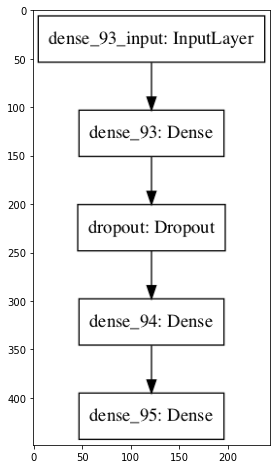

In [50]:
NN_model = Sequential()
NN_model.add(Dense(random_cv.best_params_['nn1'], activation='relu', input_shape=(X_train.shape[1],)))
NN_model.add(Dropout(0.1))        # to avoid overfitting
NN_model.add(Dense(random_cv.best_params_['nn2'], activation='relu'))   
NN_model.add(Dense(1, activation='selu'))
NN_model.compile(random_cv.best_params_['optimizer'], loss=MSLE)
print(NN_model.summary())

# Plot the model
plot_model(NN_model, to_file='NN_model.png')

# Display the image
fig, ax = plt.subplots()
fig.set_size_inches([16, 8])
model_image = plt.imread('NN_model.png')
plt.imshow(model_image)
plt.show()

In [51]:
%%time
early_stopping = EarlyStopping(monitor='loss', patience=8)
history = NN_model.fit(X_train, Y_train, 
                       epochs=600,  
                       callbacks = [early_stopping], validation_split=0.2, verbose=0) 

NN_model.evaluate(X_val, Y_val, verbose=1)

10/10 [==============================] - 0s 1ms/step - loss: 0.1094
CPU times: user 13.4 s, sys: 1.69 s, total: 15.1 s
Wall time: 10.5 s


0.10942650586366653

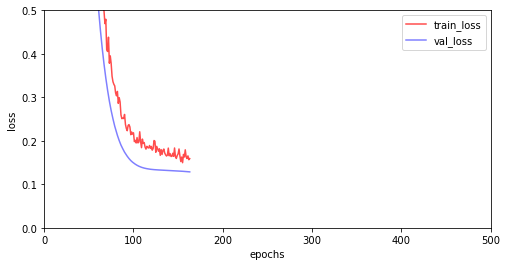

In [52]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

fig, ax = plt.subplots()
fig.set_size_inches([8, 4])
ax.plot(train_loss, color='r', alpha=0.7, label='train_loss')
ax.plot(val_loss, color='b', alpha=0.5, label='val_loss')
ax.set(xlim=[0,500],ylim=[0,0.5])
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.legend()
plt.show()

In [53]:
Y_pred_nn = NN_model.predict(X_val)

## 4. Model comparison and conclusions

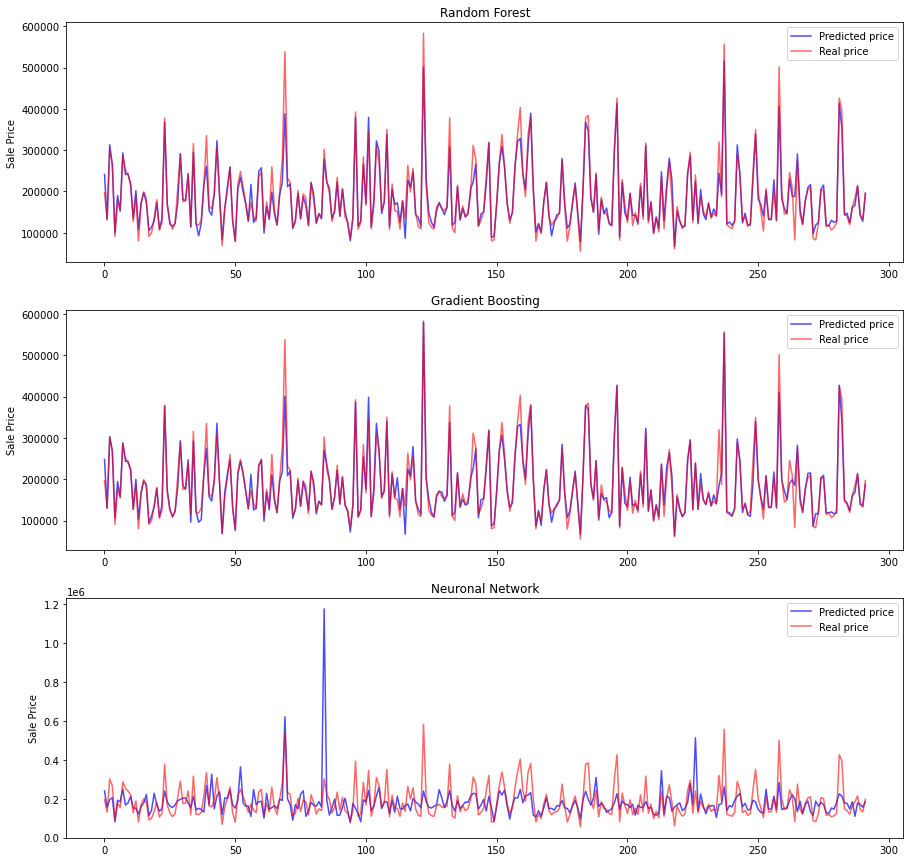

In [54]:
fig, ax = plt.subplots(3, 1,  figsize=(15, 15))
ax[0].plot(Y_pred_rf, color='b', alpha=0.7, label='Predicted price')
ax[0].plot(Y_val, color='r', alpha=0.6, label='Real price')
ax[0].legend()
ax[0].set_title('Random Forest')
ax[0].set_ylabel('Sale Price')

ax[1].plot(Y_pred_gb, color='b', alpha=0.7, label='Predicted price')
ax[1].plot(Y_val, color='r', alpha=0.6, label='Real price')
ax[1].legend()
ax[1].set_title('Gradient Boosting')
ax[1].set_ylabel('Sale Price')

ax[2].plot(Y_pred_nn, color='b', alpha=0.7, label='Predicted price')
ax[2].plot(Y_val, color='r', alpha=0.6, label='Real price')
ax[2].legend()
ax[2].set_title('Neuronal Network')
ax[2].set_ylabel('Sale Price')

plt.show()

In [55]:
print('Mean Absolue Error\n')
print('Random Forest: ', round(metrics.mean_absolute_error(Y_pred_rf, Y_val), 3))
print('Gradient Boosting: ', round(metrics.mean_absolute_error(Y_pred_rf, Y_val), 3))
print('Neuronal Network: ', round(metrics.mean_absolute_error(Y_pred_nn, Y_val), 3))

Mean Absolue Error

Random Forest:  12542.429
Gradient Boosting:  12542.429
Neuronal Network:  52449.168


**Conclusions**

The similar results were obtained using Random Forest and Gradient Boosting algorithms. Both models predicted enough good the houses prices. The Neuronal Network was less accurate and tended to overfit. 

We have seen that the most complex model not always gives the best results. Also the ensembles such as Random Forest and Gradient Boosting are good choice for regression with many features and not a large dataset.